In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 5.8 MB/s eta 0:00:00-:--:--


In [4]:
# Eğer yüklü değilse, 
# !pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

import matplotlib.pyplot as plt
%matplotlib inline

print("Kütüphaneler yüklendi ve hazır.")

Kütüphaneler yüklendi ve hazır.


In [5]:
# Girdi: Servis kalitesi (0 - 10)
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')

# Girdi: Yemek kalitesi (0 - 10)
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')

# Çıktı: Bahşiş (yüzde 0 - 25 arası)
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

print("Evrenler tanımlandı.")

Evrenler tanımlandı.


In [6]:
# Servis üyelik fonksiyonları
service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])

# Yemek üyelik fonksiyonları
food['bad'] = fuzz.trimf(food.universe, [0, 0, 5])
food['acceptable'] = fuzz.trimf(food.universe, [0, 5, 10])
food['delicious'] = fuzz.trimf(food.universe, [5, 10, 10])

# Bahşiş üyelik fonksiyonları (0 - 25)
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

print("Üyelik fonksiyonları atandı.")

Üyelik fonksiyonları atandı.


/Users/atakanemre/.pyenv/versions/3.11.0/lib/python3.11/site-packages/skfuzzy/control/term.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


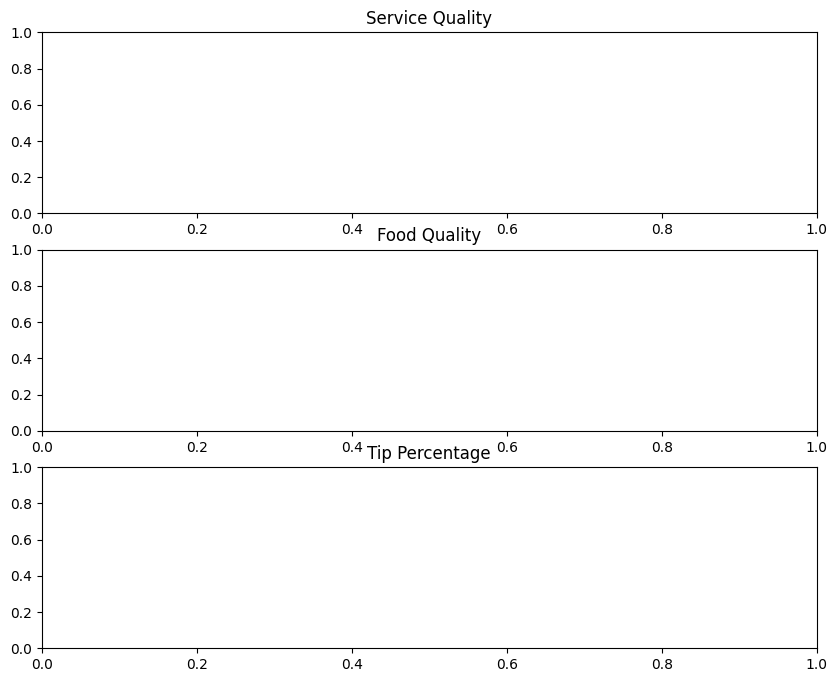

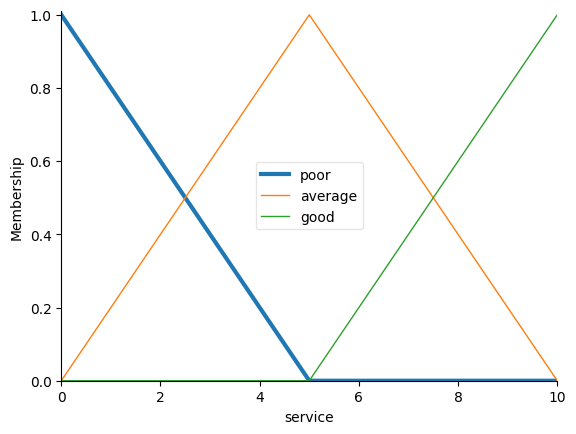

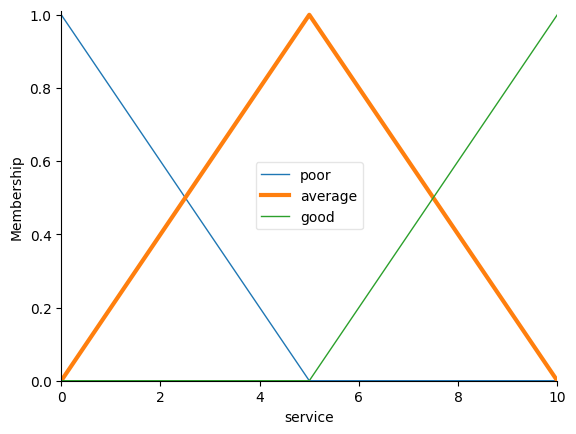

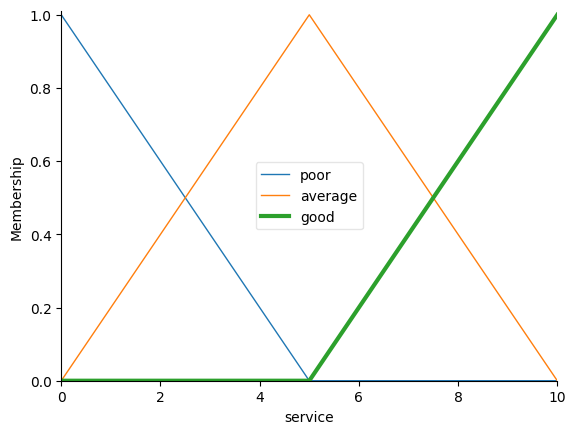

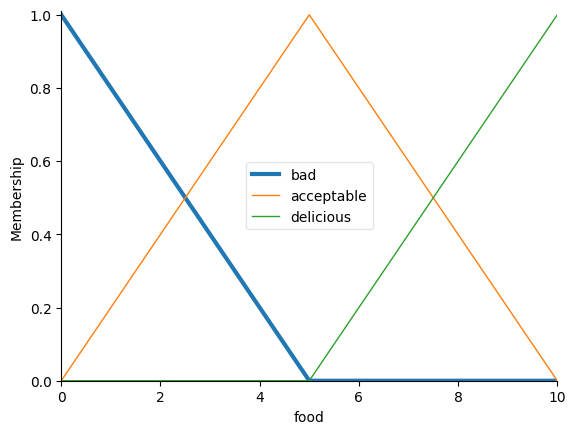

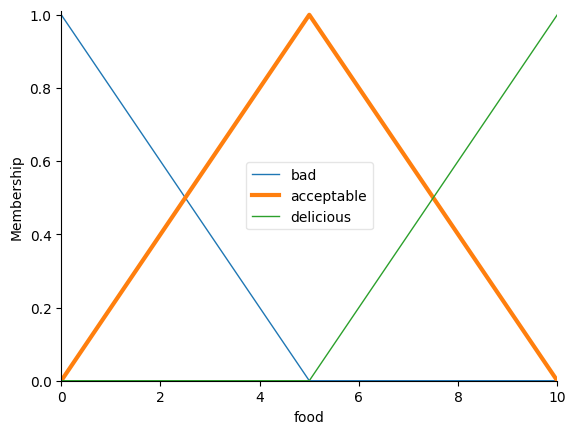

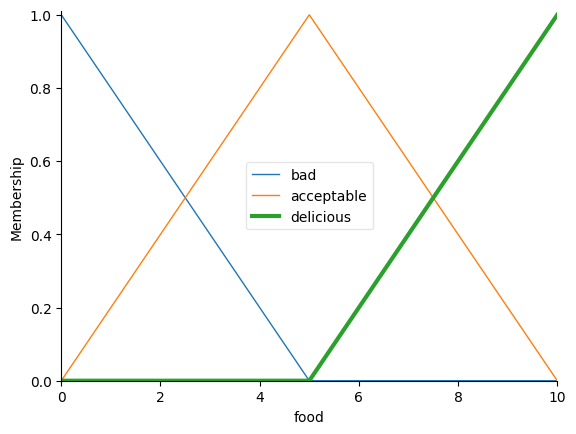

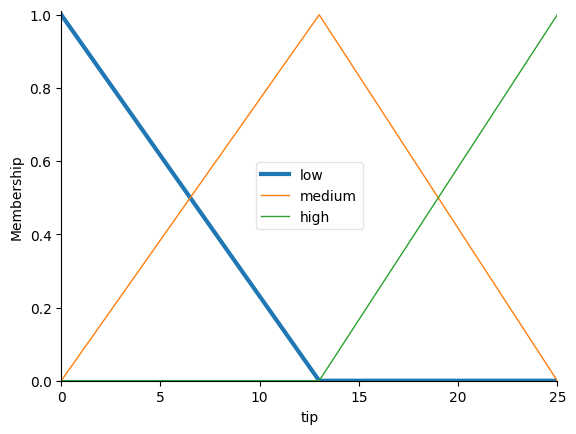

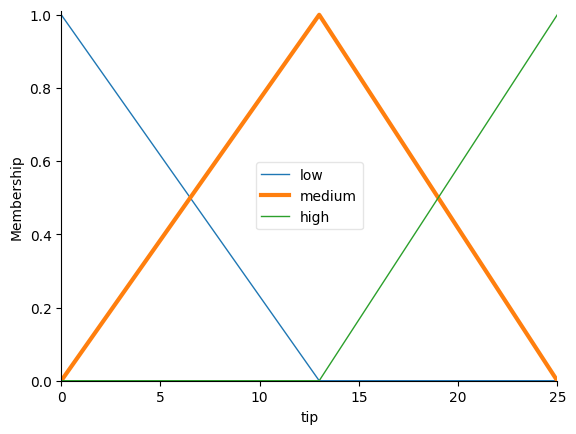

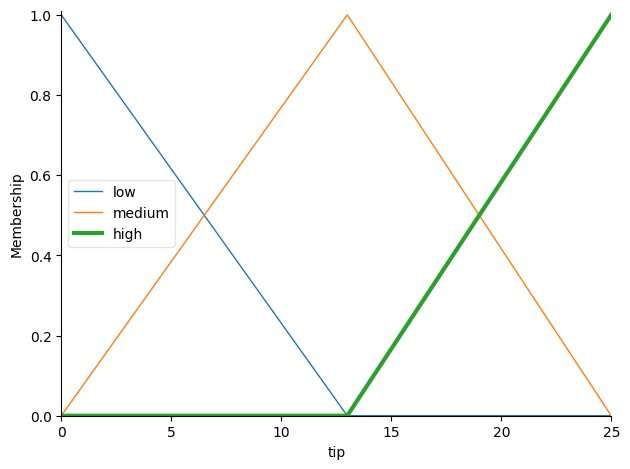

In [7]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 8))

# Servis grafiği
service['poor'].view(ax=ax0)
service['average'].view(ax=ax0)
service['good'].view(ax=ax0)
ax0.set_title("Service Quality")

# Yemek grafiği
food['bad'].view(ax=ax1)
food['acceptable'].view(ax=ax1)
food['delicious'].view(ax=ax1)
ax1.set_title("Food Quality")

# Bahşiş grafiği
tip['low'].view(ax=ax2)
tip['medium'].view(ax=ax2)
tip['high'].view(ax=ax2)
ax2.set_title("Tip Percentage")

plt.tight_layout()
plt.show()

In [8]:
rule1 = ctrl.Rule(service['good'] | food['delicious'], tip['high'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['poor'] | food['bad'], tip['low'])

# Bu kuralları kontrol sistemine ekleyelim
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Simülasyon oluştur
tipping_simulation = ctrl.ControlSystemSimulation(tipping_ctrl)

print("Kurallar tanımlandı ve kontrol sistemi oluşturuldu.")

Kurallar tanımlandı ve kontrol sistemi oluşturuldu.


In [9]:
# Bir örnek: servis = 7, yemek = 2
tipping_simulation.input['service'] = 7
tipping_simulation.input['food'] = 2

# Hesapla
tipping_simulation.compute()

print("Hesaplanan bahşiş yüzdesi:",
      tipping_simulation.output['tip'], "%")

Hesaplanan bahşiş yüzdesi: 11.723510690081255 %


/Users/atakanemre/.pyenv/versions/3.11.0/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


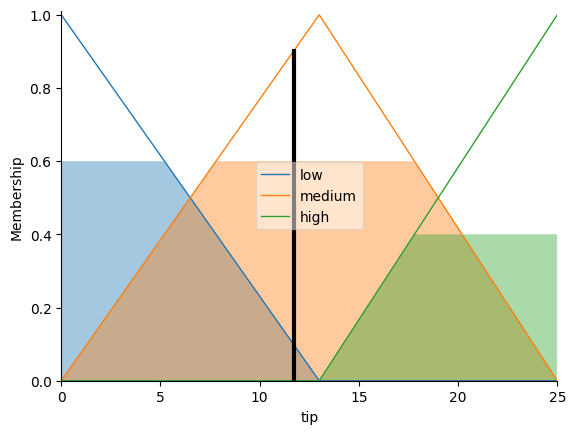

In [10]:
tip.view(sim=tipping_simulation)